# CNN kullanarak Trafik Levhalarının Tanıtılması Modeli

<img src='trafik.png'>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random

from PIL import Image
from skimage import io

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split, Dataset
import torch.optim as optim

import torchvision.datasets
import torchvision.transforms as T 
from torchvision.io import read_image
from torchvision.datasets import DatasetFolder
from torchvision.datasets.folder import default_loader

In [4]:
meta_df = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Meta.csv')
train_df = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Train.csv')
test_df = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

In [5]:
meta_df.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [6]:
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [7]:
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [8]:
train_df = train_df.drop(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2'], axis = 1)
train_df.head()

,ClassId,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png


In [10]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Conv2D,InputLayer,Reshape,MaxPooling2D,Flatten

#MaxPooling2D= en büyük rakamı buluyor
#Conv2D=CNN
#Flatten= bütün sütunları tek bir satır yapıyor
#Reshape= resmi diziye çevir

In [15]:
pip install cvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 31.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046368 sha256=dbdf6615d79d04de883c146b0d84a8b81d7b760f8d472705d72eb537b7880b0d
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25838 sha256=37e92df17178374429acbba25397f8428ca053d115972e91acd0965f9f777b59
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=248072c2513038165620a4ac1a40d36564fdbaeb811f07ae5a51355205dba120
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Succ

In [17]:
pip install python-opencv

ERROR: Could not find a version that satisfies the requirement python-opencv (from versions: none)
ERROR: No matching distribution found for python-opencv
Note: you may need to restart the kernel to use updated packages.


In [18]:
import cv2
import matplotlib.pyplot as plt
import cvlib
from cvlib.object_detection import draw_bbox

In [22]:
#pip install pycaret

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from keras.models import load_model

In [1]:
#Veri işleme(resize, change datatype, split train test, )

In [24]:
imgs_path = "/kaggle/input/gtsrb-german-traffic-sign/Train"
data = []
labels = []
CLASSES = 43
# using for loop to access each image
for i in range(CLASSES):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(imgs_path + '/' + str(i) + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("data[0]: ",data[0])
print("labels[0: ]",labels[0])

data[0]:  [[[255 253 214]
  [255 253 215]
  [255 251 216]
  ...
  [239 222 186]
  [236 220 185]
  [235 217 183]]

 [[255 255 230]
  [255 255 229]
  [255 255 230]
  ...
  [254 241 204]
  [254 240 202]
  [253 239 202]]

 [[255 255 240]
  [255 255 237]
  [255 255 234]
  ...
  [255 247 206]
  [254 246 207]
  [254 244 208]]

 ...

 [[255 255 229]
  [255 255 226]
  [255 255 222]
  ...
  [182 170 140]
  [180 167 137]
  [179 166 137]]

 [[255 255 229]
  [255 255 224]
  [255 255 222]
  ...
  [195 182 151]
  [191 180 149]
  [191 179 147]]

 [[255 255 227]
  [255 255 226]
  [255 255 224]
  ...
  [203 191 157]
  [201 190 157]
  [201 187 155]]]
labels[0: ] 0


In [25]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
# convert interge label to one-hot data
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

print(y_train[1])

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#Keras Modeli Oluşturma

In [26]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [2]:
#Train model

In [28]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
491/491 [==============================] - 60s 118ms/step - loss: 2.4791 - accuracy: 0.3912 - val_loss: 0.8543 - val_accuracy: 0.7891
Epoch 2/15
491/491 [==============================] - 58s 118ms/step - loss: 0.9619 - accuracy: 0.7179 - val_loss: 0.4744 - val_accuracy: 0.8882
Epoch 3/15
491/491 [==============================] - 57s 117ms/step - loss: 0.5128 - accuracy: 0.8476 - val_loss: 0.1933 - val_accuracy: 0.9447
Epoch 4/15
491/491 [==============================] - 58s 117ms/step - loss: 0.3384 - accuracy: 0.9005 - val_loss: 0.1115 - val_accuracy: 0.9691
Epoch 5/15
491/491 [==============================] - 59s 119ms/step - loss: 0.2615 - accuracy: 0.9231 - val_loss: 0.0891 - val_accuracy: 0.9759
Epoch 6/15
491/491 [==============================] - 60s 122ms/step - loss: 0.2175 - accuracy: 0.9374 - val_loss: 0.0648 - val_accuracy: 0.9836
Epoch 7/15
491/491 [==============================] - 59s 121ms/step - loss: 0.1844 - accuracy: 0.9483 - val_loss: 0.0692 - val_ac

In [ ]:
#Kasıp ve Doğruluk modelini görselleştirme

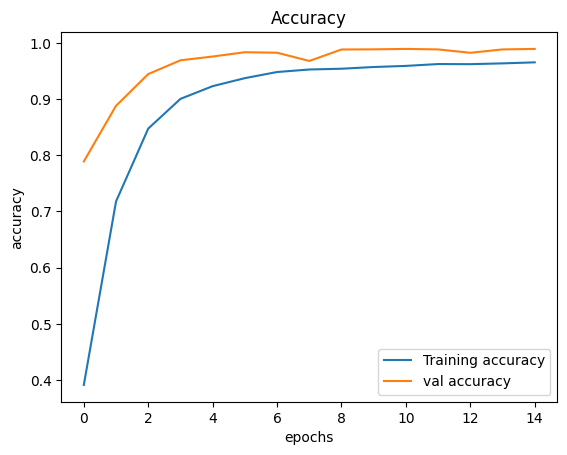

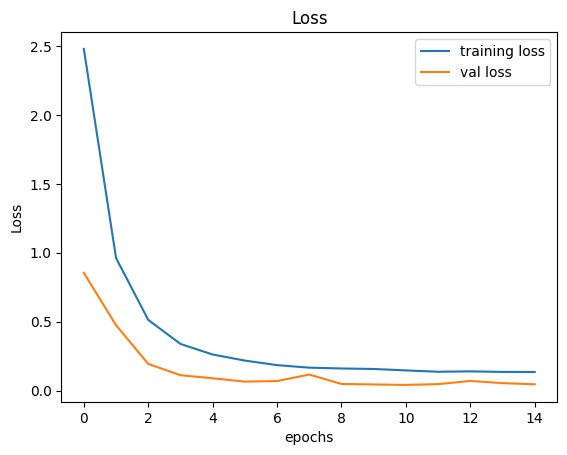

In [31]:
plt.figure(0) #underfitting
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig('underfitting.png')
plt.figure(1) #overfiting
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig('overfiting.png')
plt.show()

In [3]:
#Modeli test etme

In [32]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("/kaggle/input/gtsrb-german-traffic-sign/Test.csv")
test_labels = test['ClassId'].values.tolist()

test_img_path = "/kaggle/input/gtsrb-german-traffic-sign"
test_imgs = test['Path'].values
test_data = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)
predictions = model.predict(test_data)
classes_x = np.argmax(predictions, axis = 1).tolist()
classes_x = np.array([classes_x]).tolist()[0]

print("accuracy: ", accuracy_score(test_labels, classes_x))

395/395 [==============================] - 5s 12ms/step
accuracy:  0.9574821852731591


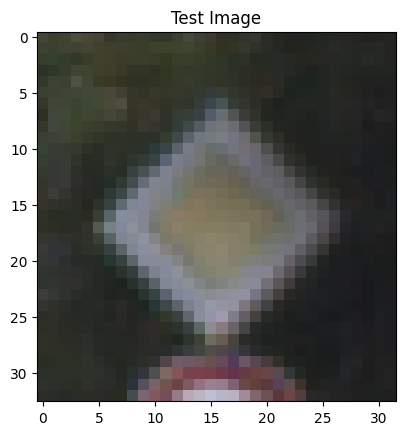

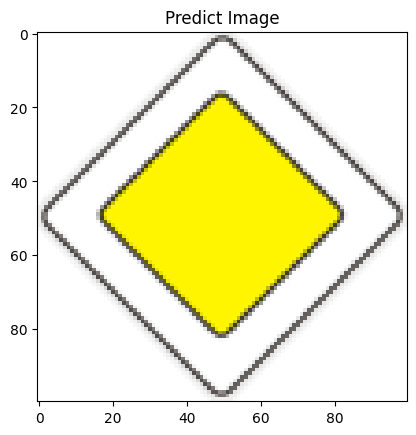

In [33]:
number_of_image_test = 7 #20

test_image_name = test_imgs[number_of_image_test]
image_label = test_labels[number_of_image_test]
plt.figure(0)
img_path = test_img_path + '/' + test_image_name
img = Image.open(img_path)
plt.imshow(img)
plt.title("Test Image")
plt.figure(1)
img_pre = Image.open('/kaggle/input/gtsrb-german-traffic-sign/Meta/' + str(classes_x[number_of_image_test]) + '.png')
plt.imshow(img_pre)
plt.title("Predict Image")
plt.show()